In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print("Shape of x_train :- ",x_train.shape)
print("No. of Samples in x_train :- ",len(x_train))

Shape of x_train :-  (60000, 28, 28)
No. of Samples in x_train :-  60000


In [4]:
x_train = tf.image.per_image_standardization(x_train)
x_test = tf.image.per_image_standardization(x_test)

In [5]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

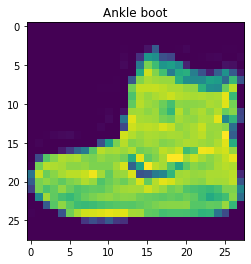

In [6]:
plt.imshow(x_train[0])
plt.title(class_names[y_train[0]])

In [7]:
IMAGE_SIZE = 28
x_test = np.array(x_test).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
x_train = np.array(x_train).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)

In [8]:
print("New Shape of x_train :- ",x_train.shape)

New Shape of x_train :-  (60000, 28, 28, 1)


In [9]:
from tensorflow.keras.layers import Dense,Conv2D,Activation,MaxPooling2D,Flatten,GlobalAveragePooling2D
import tensorflow.keras.backend as K 

In [10]:

# model = tf.keras.Sequential()

# model.add(Conv2D(16,(3,3),padding='same',input_shape=x_train.shape[1:]))  
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(32,(3,3),strides=2,padding='valid'))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(32,(2,2),padding='same')) 
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64,(2,2),strides=2,padding='valid'))
# model.add(Activation("relu"))

# model.add(GlobalAveragePooling2D())
# model.add(Dense(64))
# model.add(Activation("relu"))
# model.add(Dense(10))
# model.add(Activation("softmax"))

# model.summary()


In [11]:
model1 = tf.keras.Sequential()  #This model is working

model1.add(Conv2D(4,kernel_size=(2,2) ,padding='valid',strides=2,input_shape=x_train.shape[1:])) #Reduction Layer
model1.add(Activation('relu'))

model1.add(Conv2D(8,(2,2),padding='same')) 
model1.add(Activation("relu"))

model1.add(Conv2D(4,kernel_size=(2,2) ,padding='valid',strides=2))  #Reduction Layer
model1.add(Activation('relu'))

model1.add(Conv2D(16,(2,2),padding='same')) 
model1.add(Activation("relu"))

model1.add(GlobalAveragePooling2D())
model1.add(Dense(64))
model1.add(Activation("relu"))
model1.add(Dense(10))
model1.add(Activation("softmax"))




model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 4)         20        
_________________________________________________________________
activation (Activation)      (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         136       
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 4)           132       
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 4)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          2

In [12]:
# model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [13]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [14]:
# history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

In [15]:
history1 = model1.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 14s 9ms/step - loss: 1.2493 - accuracy: 0.5206 - val_loss: 0.9221 - val_accuracy: 0.6459
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.8270 - accuracy: 0.6916 - val_loss: 0.7516 - val_accuracy: 0.7155
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.7480 - accuracy: 0.7197 - val_loss: 0.7459 - val_accuracy: 0.7218
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.7072 - accuracy: 0.7360 - val_loss: 0.7146 - val_accuracy: 0.7507
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.6757 - accuracy: 0.7476 - val_loss: 0.6715 - val_accuracy: 0.7563
Epoch 6/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.6471 - accuracy: 0.7584 - val_loss: 0.6355 - val_accuracy: 0.7639
Epoch 7/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.6226 - accuracy: 0.7675 - val_loss: 0.6095 - val_ac

In [25]:
results = model1.evaluate(x=x_test,y=y_test,verbose=0)

In [24]:
results[1]

0.7865999937057495

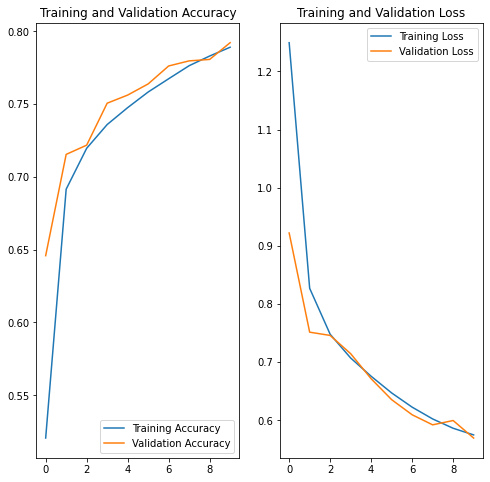

In [16]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
print(max(acc),
max(val_acc))

0.7891250252723694 0.7922499775886536


In [17]:
len(model1.trainable_variables)

12

In [18]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model1.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in model1.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams
 
print(trainableParams)
print(nonTrainableParams)
print(totalParams)

2298
0.0
2298.0
